In [2]:
# Import data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import fetch_20newsgroups_vectorized
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import datasets
from sklearn import metrics
import types
import statsmodels.api as smimport statsmodels.formula.api as smf
from sklearn.manifold import TSNE
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)



In [23]:
# create dataset
df = pd.read_csv('DataSet.csv')

In [24]:
# columns on dataset
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [156]:
# Checking if there is no null value
df.count()

Country                          158
Region                           158
Happiness Rank                   158
Happiness Score                  158
Standard Error                   158
Economy (GDP per Capita)         158
Family                           158
Health (Life Expectancy)         158
Freedom                          158
Trust (Government Corruption)    158
Generosity                       158
Dystopia Residual                158
dtype: int64

In [43]:
# Seeing last countries
df.tail()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


In [145]:
# Criando gráfico 
dfMap = dict(type = 'choropleth', 
             locations = df['Country'],
             locationmode = 'country names',
             z = df['Happiness Score'], 
             text = df['Country'],
             colorbar = {'title':'Valor de Felicidade pelo Mundo'})

# Criando Layout
layout = dict(title = 'Valor de Felicidade pelo Mundo', geo = dict(showframe = False))

# Criando figura que será exibida
WorldMap = go.Figure(data = [dfMap], layout=layout)

# Exibindo figura/gráfico
iplot(WorldMap)

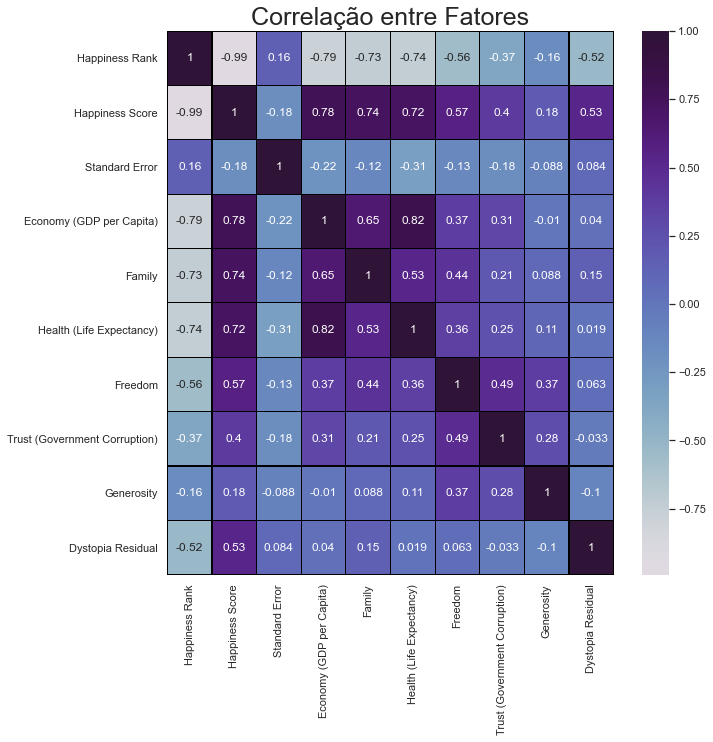

In [160]:
# avaliando a correlação
plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, linewidths = 0.2, linecolor='black', cmap='twilight_shifted_r', center=-1)
plt.title('Correlação entre Fatores', size=25)
plt.show()


In [54]:
fig = px.scatter(df, x="Happiness Score", y="Economy (GDP per Capita)", trendline="ols")
fig.show()
fig = px.scatter(df, x="Happiness Score", y="Family", trendline="ols")
fig.show()
fig = px.scatter(df, x="Happiness Score", y="Health (Life Expectancy)", trendline="ols")
fig.show()

In [57]:
df['Continent'] = df['Region']
df['Continent']=df['Continent'].apply(lambda x: x.replace('Western Europe', 'Europe'))
df['Continent']=df['Continent'].apply(lambda x: x.replace('Central and Eastern Europe', 'Europe'))
df['Continent']=df['Continent'].apply(lambda x: x.replace('Middle East and Northern Africa', 'Africa'))
df['Continent']=df['Continent'].apply(lambda x: x.replace('Sub-Saharan Africa', 'Africa'))
df['Continent']=df['Continent'].apply(lambda x: x.replace('Southeastern Asia', 'Asia'))
df['Continent']=df['Continent'].apply(lambda x: x.replace('Eastern Asia', 'Asia'))
df['Continent']=df['Continent'].apply(lambda x: x.replace('Southern Asia', 'Asia'))

In [59]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Continent
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,Europe
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,Europe
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,Europe
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,Europe
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,North America


In [182]:
trace = go.Scatter(x = df['Continent'],
                   y = df['Happiness Score'],
                   mode = 'markers',
                   marker =  {'color' : '#e74c3c',
                              'line' : {'width': 1,
                                        'color': '#c0392b'}},
                   opacity=.8, text=df['Country'])
data = [trace]
layout = go.Layout(title='Relação Continente e Felicidade',
                   yaxis={'title':'Valor de Felicidade'},
                   xaxis={'title': 'Continente'})
fig = go.Figure(data=data, layout=layout)
iplot(fig)


In [93]:
df.groupby('Continent').mean()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Continent,,,,,,,,,,
Africa,111.133333,4.604167,0.052311,0.609307,0.846220,0.423426,0.364546,0.143152,0.210883,2.006656
Asia,86.818182,5.167273,0.037850,0.815253,0.889910,0.688470,0.472829,0.129336,0.341757,1.829736
Australia and New Zealand,9.500000,7.285000,0.037270,1.291880,1.314450,0.919965,0.645310,0.392795,0.455315,2.265355
Europe,58.220000,5.902740,0.042023,1.092024,1.134631,0.798731,0.438765,0.147485,0.215199,2.075910
Latin America and Caribbean,46.909091,6.144682,0.061127,0.876815,1.104720,0.703870,0.501740,0.117172,0.217788,2.622577
North America,10.000000,7.273000,0.036960,1.360400,1.284860,0.883710,0.589505,0.244235,0.429580,2.480935


In [107]:
df.groupby('Continent')['Happiness Score'].mean()

Continent
Africa                         4.604167
Asia                           5.167273
Australia and New Zealand      7.285000
Europe                         5.902740
Latin America and Caribbean    6.144682
North America                  7.273000
Name: Happiness Score, dtype: float64

Text(0.5, 1.0, 'Média do Valor de Felicidade por Continente')

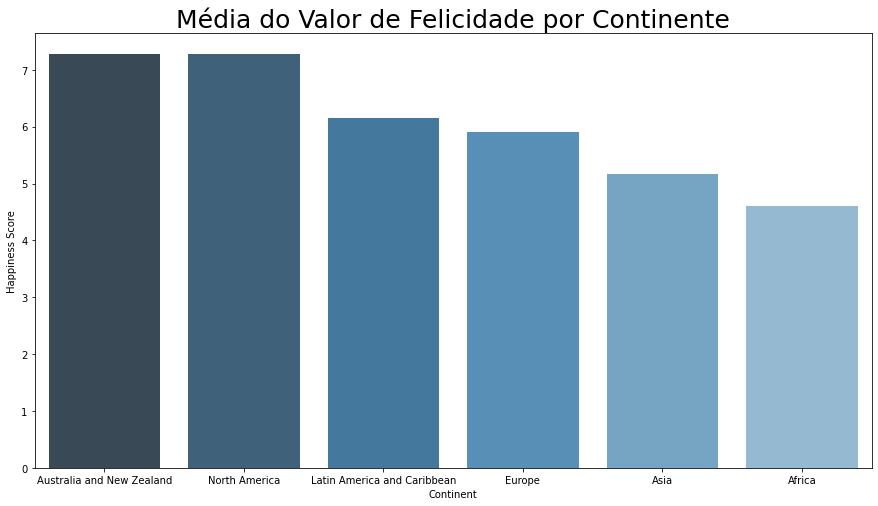

In [177]:
grouped = df.groupby('Continent')['Happiness Score'].mean().reset_index()
ordered = grouped.sort_values('Happiness Score', ascending=False)
plt.figure(figsize=(15,8))
ax = sns.barplot(x="Continent", y="Happiness Score", data=ordered,
                 palette="Blues_d")
plt.title('Média do Valor de Felicidade por Continente', size=25)



Text(0.5, 1.0, 'Média do Valor de Felicidade por Região')

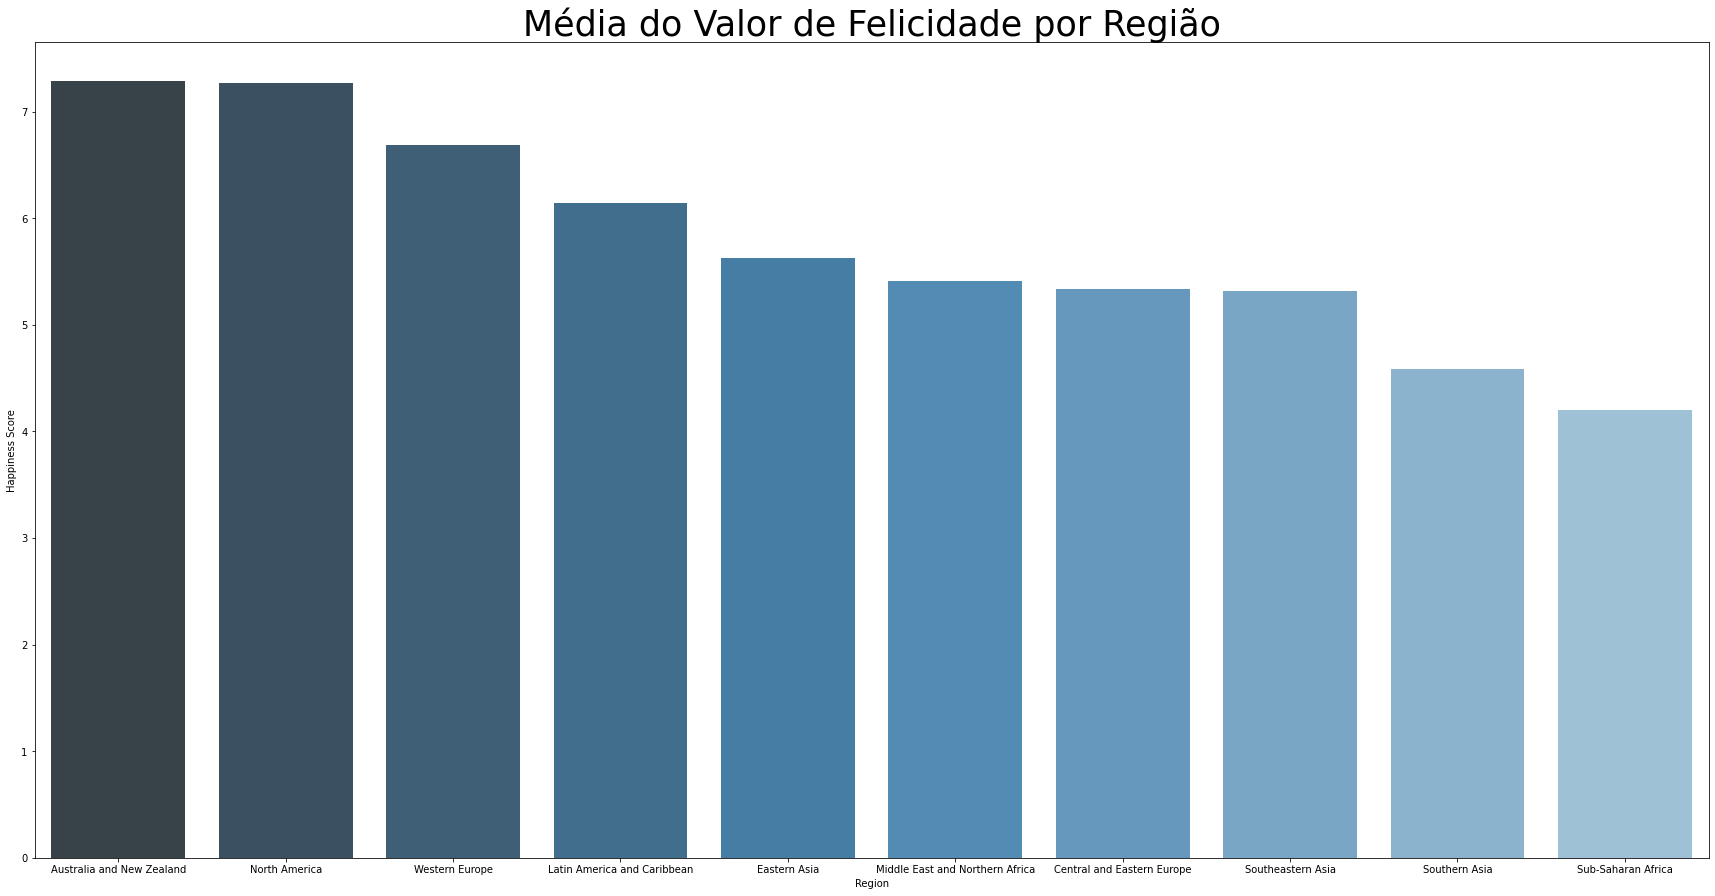

In [179]:
grouped = df.groupby('Region')['Happiness Score'].mean().reset_index()
ordered = grouped.sort_values('Happiness Score', ascending=False)
plt.figure(figsize=(30,15))
ax = sns.barplot(x="Region", y="Happiness Score", data=ordered,
                 palette="Blues_d")
plt.title('Média do Valor de Felicidade por Região', size=35)

